<h1>MS Learn: Matplotlib 1</h1>
<h2>Data visualization with Python</h2>
<h3>Exercise from <a>https://learn.microsoft.com/en-us/training/modules/explore-analyze-data-with-python/5-exercise-visualize-data</a> with minor modifications.</h3>

Import Pandas library.

In [21]:
import pandas as pd

Get dataset and open as a DataFrame. We should delete rows with not available data.

In [22]:
df=pd.read_csv('students.csv',header='infer')
df=df.dropna(axis=0)
print(df)

         Name  StudyHours  Grade
0         Dan       10.00   50.0
1       Joann       11.50   50.0
2       Pedro        9.00   47.0
3       Rosie       16.00   97.0
4       Ethan        9.25   49.0
5       Vicky        1.00    3.0
6    Frederic       11.50   53.0
7      Jimmie        9.00   42.0
8      Rhonda        8.50   26.0
9    Giovanni       14.50   74.0
10  Francesca       15.50   82.0
11      Rajab       13.75   62.0
12    Naiyana        9.00   37.0
13       Kian        8.00   15.0
14      Jenny       15.50   70.0
15     Jakeem        8.00   27.0
16     Helena        9.00   36.0
17      Ismat        6.00   35.0
18      Anila       10.00   48.0
19       Skye       12.00   52.0
20     Daniel       12.50   63.0
21      Aisha       12.00   64.0


Add a 'Pass' column to de DataFrame.

In [23]:
a=pd.Series(df['Grade']>=60)
df=pd.concat([df, a.rename("Pass")], axis=1)
print(df)

         Name  StudyHours  Grade   Pass
0         Dan       10.00   50.0  False
1       Joann       11.50   50.0  False
2       Pedro        9.00   47.0  False
3       Rosie       16.00   97.0   True
4       Ethan        9.25   49.0  False
5       Vicky        1.00    3.0  False
6    Frederic       11.50   53.0  False
7      Jimmie        9.00   42.0  False
8      Rhonda        8.50   26.0  False
9    Giovanni       14.50   74.0   True
10  Francesca       15.50   82.0   True
11      Rajab       13.75   62.0   True
12    Naiyana        9.00   37.0  False
13       Kian        8.00   15.0  False
14      Jenny       15.50   70.0   True
15     Jakeem        8.00   27.0  False
16     Helena        9.00   36.0  False
17      Ismat        6.00   35.0  False
18      Anila       10.00   48.0  False
19       Skye       12.00   52.0  False
20     Daniel       12.50   63.0   True
21      Aisha       12.00   64.0   True


Import pyplot from Matplotlib library and plot a graph.

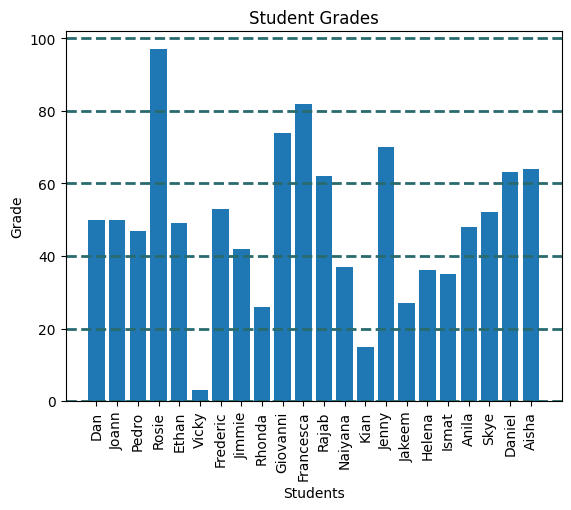

In [24]:
from matplotlib import pyplot as plt

#Defines x as student name and y as student grade
plt.bar(x=df.Name,height=df.Grade)

#Adds a title to the graph
plt.title('Student Grades')

#Labels each axis on the graph
plt.xlabel('Students')
plt.ylabel('Grade')

#Colours the y lines of the grid, adds a dotted style and defines line width
plt.grid(color='#286a6d', linestyle='--',linewidth=2,axis='y')

#Rotates the labes for name to make them readable
plt.xticks(rotation=90)

#Prints the graph
plt.show()

Create two subplots on the graph.

C:\Users\gonza\AppData\Local\Temp\ipykernel_4468\3401212616.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df.Name, rotation=90)
C:\Users\gonza\AppData\Local\Temp\ipykernel_4468\3401212616.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


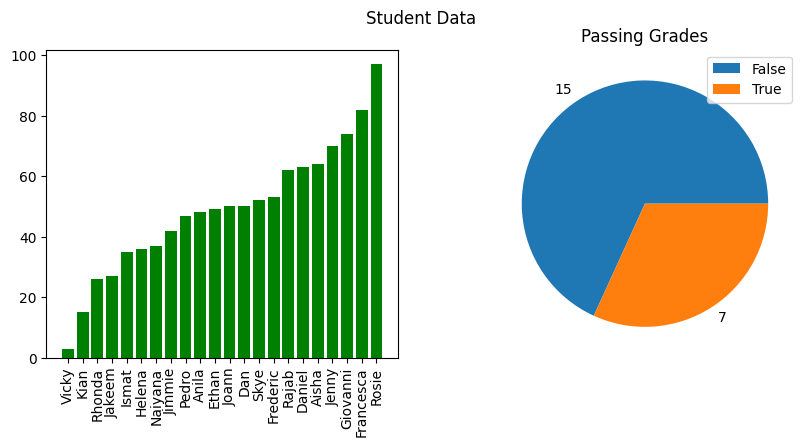

In [25]:
#Sorts DataFrame to have a more clear picture of the data
df=df.sort_values(by='Grade')

#Create two subplots
fig,ax=plt.subplots(1,2,figsize=(10,4))

#Change label orientation to get an simpler view
ax[0].set_xticklabels(df.Name, rotation=90)

#Bar plot for name vs grade
ax[0].bar(x=df.Name,height=df.Grade, color='green')


#Counts students that passed and students that did not
studentsPass=df['Pass'].value_counts()

#Pie chart for students above or equal to and under 60 on Grades
ax[1].pie(studentsPass, labels=studentsPass)
ax[1].set_title('Passing Grades')
ax[1].legend(studentsPass.keys().tolist())

#Add a title to the graph
fig.suptitle('Student Data')

fig.show()

Now graph student vs study hours with Pandas.

<AxesSubplot: xlabel='Name'>

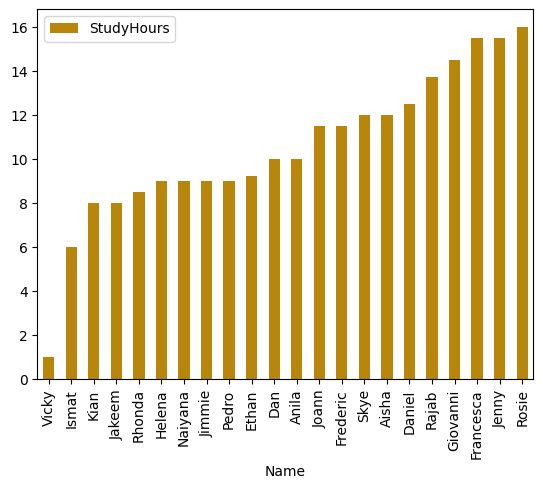

In [26]:
df=df.sort_values(by='StudyHours')
df.plot.bar(x='Name',y='StudyHours',color='darkgoldenrod')

<h2>Statistical Analysis</h2>
<h3>After maniulating and visualizing data we can analyse it.

We will use some statistics concepts to prepare data for Machine Learning modeling.</h3>

<h3>Estadística Descriptiva</h3>

When analysing a variable like 'Grades' we may be interested in distribution. We start most of the times by visualizing data as a histogram.

C:\Users\gonza\AppData\Local\Temp\ipykernel_4468\2892233908.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


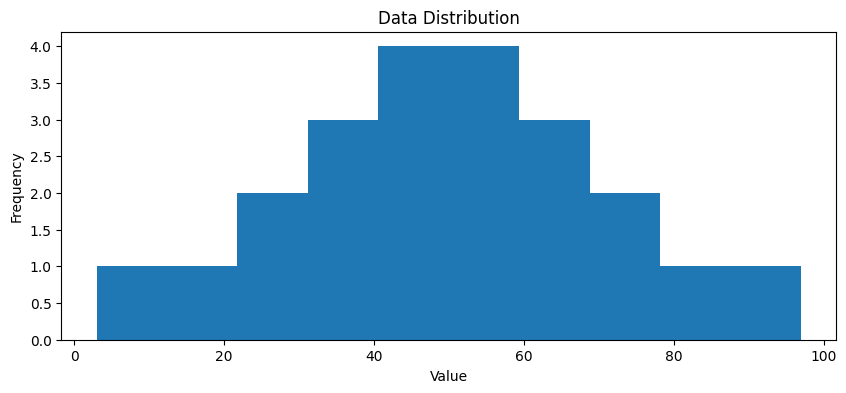

In [27]:
#Create a variable to study, in this case the grades students got to know the frequency of each.
variable=df['Grade']

#Create a graph for the histogram
fig=plt.figure(figsize=(10,4))

#Plot a histogram
plt.hist(variable)

#Set a title for the graph
plt.title('Data Distribution')

#Set the x axis as the value of the grades
plt.xlabel('Value')

#Set y axis as frenquency of the value
plt.ylabel('Frequency')

#Show graph
fig.show()

We can also use a box plot to visualize the grade data.

C:\Users\gonza\AppData\Local\Temp\ipykernel_4468\570032880.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


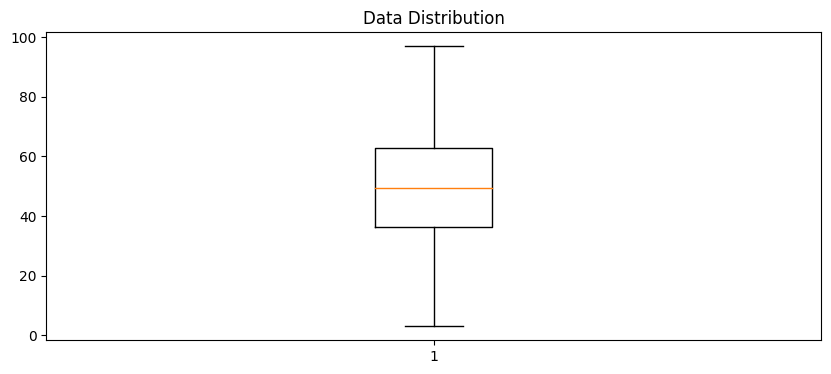

In [28]:
#Create a graph
fig=plt.figure(figsize=(10,4))

#Plot a a box graph
plt.boxplot(variable)

#Set title
plt.title('Data Distribution')

#Display graph
fig.show()

Let's create a function to plot graphs that we can reuse.

[3.0, 97.0, 49.18181818181818, 49.5, 50.0]


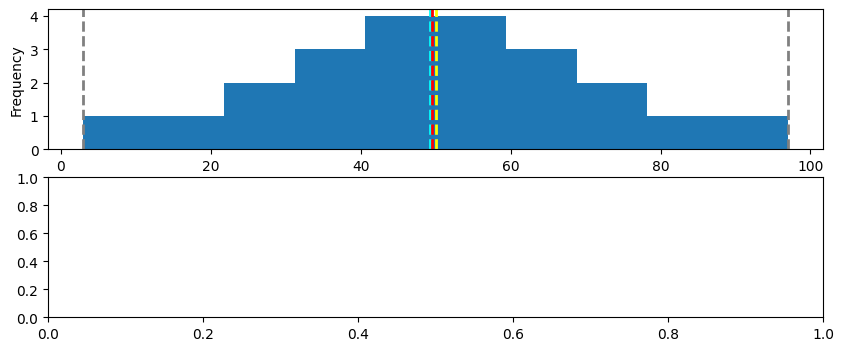

In [29]:
def distribution(variable):
    #Import pyplot in case it isn't already loaded
    from matplotlib import pyplot as plt

    #Get statistics
    min_val=variable.min()
    max_val=variable.max()
    mean_val=variable.mean()
    med_val=variable.median()
    mod_val=variable.mode()[0]

    #Create a list with the values
    distribution_values=[min_val,max_val,mean_val,med_val,mod_val]

    #Print the values
    print(distribution_values)

    #Create a figure with two subplots(2 rows, 1 column)
    fig, ax=plt.subplots(2,1,figsize=(10,4))
    ax[0].hist(variable)
    ax[0].set_ylabel('Frequency')

    #Add lines to show mean, median and mode
    ax[0].axvline(min_val, color='gray',linestyle='dashed',linewidth=2)
    ax[0].axvline(mean_val,color='cyan',linestyle='dashed',linewidth=2)
    ax[0].axvline(med_val, color='red',linestyle='dashed',linewidth=2)
    ax[0].axvline(mod_val, color='yellow',linestyle='dashed',linewidth=2)
    ax[0].axvline(max_val, color='gray',linestyle='dashed',linewidth=2)

    #Show the graph
    plt.show()

#Try the function
col=df['Grade']
distribution(col)

As expected, the histogram of density shows a bell curve or normal distribution. Mean and mode at the center descend into min and max symmetrically.